In [64]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Flatten, MaxPooling2D, Conv2D
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [65]:
data = pd.read_csv("sign_mnist_train.csv")
data_test = pd.read_csv("sign_mnist_test.csv")
data

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,...,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,...,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,...,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,...,119,56,27,58,102,79,47,64,87,93


In [66]:
data = data.T
data_test = data_test.T
data

,0,1,2,3,4,5,6,7,8,9,...,27445,27446,27447,27448,27449,27450,27451,27452,27453,27454
label,3,6,2,2,13,16,8,22,3,3,...,14,19,11,12,20,13,23,18,17,23
pixel1,107,155,187,211,164,161,134,114,169,189,...,167,133,170,149,162,189,151,174,177,179
pixel2,118,157,188,211,167,168,134,42,174,189,...,169,135,172,151,168,189,154,174,181,180
pixel3,127,156,188,212,170,172,135,74,176,189,...,170,138,175,153,172,190,157,174,184,180
pixel4,134,156,187,212,172,173,135,99,180,190,...,171,141,177,157,176,190,158,174,185,180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel780,206,163,199,226,163,55,189,225,114,201,...,201,0,229,153,229,200,196,204,79,203
pixel781,206,175,198,225,157,48,179,227,94,193,...,167,0,227,147,228,234,195,203,47,197
pixel782,204,103,195,222,163,238,181,227,74,175,...,119,0,228,148,228,200,195,202,64,205
pixel783,203,135,194,229,164,255,181,228,61,178,...,75,0,227,139,227,222,195,200,87,209


In [67]:
X_train = data[1:]
X_test = data_test[1:]
X_train = np.array(X_train.T)
X_test = np.array(X_test.T)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype("float32")
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype("float32")
X_train /= 255
X_test /= 255
X_train.shape

(27455, 28, 28, 1)

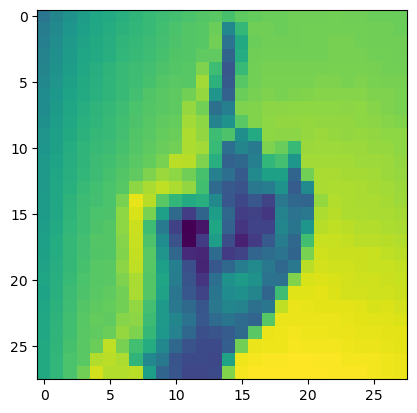

In [68]:
plt.imshow(X_train[0])
plt.show()

In [69]:
n_classes = 25
y_train = data.T["label"]
y_test = data_test.T["label"]
y_train = np.array(y_train)
y_test = np.array(y_test)
y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)
y_train[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [70]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
    Conv2D(64, kernel_size=(3, 3), activation="relu"),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation="relu"),
    Dropout(0.5),
    Dense(n_classes, activation="softmax")
])

In [73]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model.fit(X_train, y_train, batch_size=128, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
215/215 [==============================] - 6s 23ms/step - loss: 0.0296 - accuracy: 0.9893 - val_loss: 0.6875 - val_accuracy: 0.9189
Epoch 2/100
215/215 [==============================] - 4s 21ms/step - loss: 0.0280 - accuracy: 0.9903 - val_loss: 0.7620 - val_accuracy: 0.9116
Epoch 3/100
215/215 [==============================] - 4s 21ms/step - loss: 0.0271 - accuracy: 0.9902 - val_loss: 0.7131 - val_accuracy: 0.9209
Epoch 4/100
215/215 [==============================] - 4s 21ms/step - loss: 0.0248 - accuracy: 0.9909 - val_loss: 0.7775 - val_accuracy: 0.9176
Epoch 5/100
215/215 [==============================] - 5s 21ms/step - loss: 0.0242 - accuracy: 0.9915 - val_loss: 0.7421 - val_accuracy: 0.9141
Epoch 6/100
215/215 [==============================] - 5s 21ms/step - loss: 0.0211 - accuracy: 0.9922 - val_loss: 0.7524 - val_accuracy: 0.9318
Epoch 7/100
215/215 [==============================] - 5s 22ms/step - loss: 0.0217 - accuracy: 0.9923 - val_loss: 0.7642 - val_accuracy:

In [83]:
model

In [74]:
z_predict = model.predict(X_test)
print(np.sum(z_predict.argmax(axis=1) == y_test.argmax(axis=1)) / len(y_test) * 100)

92.48466257668711


In [82]:
print(z_predict.argmax())
print(y_test.argmax())

6
6


In [88]:
model.save("model_sign_mnist.xml")

INFO:tensorflow:Assets written to: model_sign_mnist.xml\assets


In [89]:
from tensorflow.keras.models import load_model

In [91]:
new_model = load_model("model_sign_mnist.xml")
new_model